# Factor Analysis/PCA

In [2]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 744.4 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 37.7 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=7635e697dec7fe84c86dfc3e99337cebbdeccdf143f22813e70499921cfd8735
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [3]:
# import Python packages
import pandas as pd
import numpy as np
#from google.colab import files
from sklearn import preprocessing
import matplotlib.pyplot as plt

# regression package
import statsmodels.api as sm

# factor analysis packages
import factor_analyzer
# you could also use sklearn to run PCA

# clustering packages
from sklearn import cluster
from sklearn.cluster import KMeans
# k_means() is a wrapper that returns the result of KMeans.fit()
from yellowbrick.cluster import KElbowVisualizer

## Bank Data

In [4]:
# read in the bank data
ka = pd.read_csv('Ford_ka.csv')

# take a look at the bank data
ka.head(5)

FileNotFoundError: ignored

In [ ]:
kay = ka['Preference Group']
kay

0      1
1      3
2      2
3      3
4      1
      ..
245    1
246    1
247    1
248    2
249    1
Name: Preference Group, Length: 250, dtype: int64

In [ ]:
# prepare data to data regression of bank activity on survey data
ka_Y = ka['Preference Group']
ka_X = ka.loc[:,'Q1':'Q62']

# when we run regression we typically to include an intercept term
# so here we manually add a constant to the X variables
ka_X_const = sm.add_constant(ka_X)
ka_X_const.head(5)

,const,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62
0,1.0,6,2,4,3,1,5,5,3,4,...,2,4,5,4,5,3,4,4,4,2
1,1.0,7,7,7,5,4,4,5,4,5,...,1,1,1,1,5,4,3,5,4,5
2,1.0,5,4,6,5,7,5,3,5,4,...,3,5,6,3,4,4,5,3,4,4
3,1.0,4,2,5,4,2,4,5,4,3,...,3,5,4,4,4,2,5,5,5,3
4,1.0,5,5,7,6,7,3,4,5,4,...,6,4,5,5,4,5,4,3,4,5


In [ ]:
# run regression
ols = sm.OLS(ka_Y,ka_X_const)
ols_result = ols.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:       Preference Group   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.081
Date:                Thu, 21 Sep 2023   Prob (F-statistic):              0.339
Time:                        15:28:03   Log-Likelihood:                -265.50
No. Observations:                 250   AIC:                             657.0
Df Residuals:                     187   BIC:                             878.9
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1099      2.038      2.017      0.0

In [ ]:
# look at the correlation matrix
question_corr = ka_X.corr()

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
question_corr

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62
Q1,1.000000,0.601361,-0.312305,-0.405462,0.062362,0.035624,-0.008112,-0.138684,0.020069,0.080944,...,-0.229073,-0.496022,-0.569181,-0.477947,0.196016,0.199920,0.287066,-0.192204,-0.090904,-0.214538
Q2,0.601361,1.000000,-0.094563,-0.029517,0.351080,0.037515,0.041873,-0.095835,0.055010,0.034040,...,-0.626874,-0.672151,-0.705959,-0.624428,-0.081489,-0.052058,-0.041673,0.005075,0.197174,0.128702
Q3,-0.312305,-0.094563,1.000000,0.491049,0.419219,0.002657,0.020382,0.082309,-0.003830,0.016012,...,0.060678,0.176503,0.243885,0.236032,-0.192105,-0.142556,-0.235279,0.091215,0.107263,0.120768
Q4,-0.405462,-0.029517,0.491049,1.000000,0.359979,-0.074628,0.005307,0.101306,0.037564,-0.000105,...,-0.224142,0.044553,0.064325,0.063997,-0.465823,-0.429073,-0.434296,0.403604,0.417181,0.392996
Q5,0.062362,0.351080,0.419219,0.359979,1.000000,0.011973,-0.028457,0.010562,-0.033327,-0.010970,...,-0.072507,-0.130972,-0.131661,-0.020807,-0.082839,0.029062,-0.010106,-0.083726,-0.022275,0.051397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q58,0.199920,-0.052058,-0.142556,-0.429073,0.029062,0.048809,-0.155240,-0.033266,-0.010490,-0.037848,...,0.404093,0.135404,0.036418,0.093779,0.381676,1.000000,0.326561,-0.414129,-0.410836,-0.374114
Q59,0.287066,-0.041673,-0.235279,-0.434296,-0.010106,0.017197,-0.106480,-0.004078,-0.027063,-0.056023,...,0.350132,0.114954,0.059781,0.107403,0.376368,0.326561,1.000000,-0.414534,-0.465013,-0.358305
Q60,-0.192204,0.005075,0.091215,0.403604,-0.083726,-0.071310,0.178623,0.044531,-0.006595,0.051279,...,-0.387325,-0.120857,-0.109860,-0.209391,-0.409143,-0.414129,-0.414534,1.000000,0.405476,0.332648
Q61,-0.090904,0.197174,0.107263,0.417181,-0.022275,-0.025769,0.065578,-0.030294,0.015110,0.093770,...,-0.500376,-0.285754,-0.206116,-0.312456,-0.506440,-0.410836,-0.465013,0.405476,1.000000,0.405401


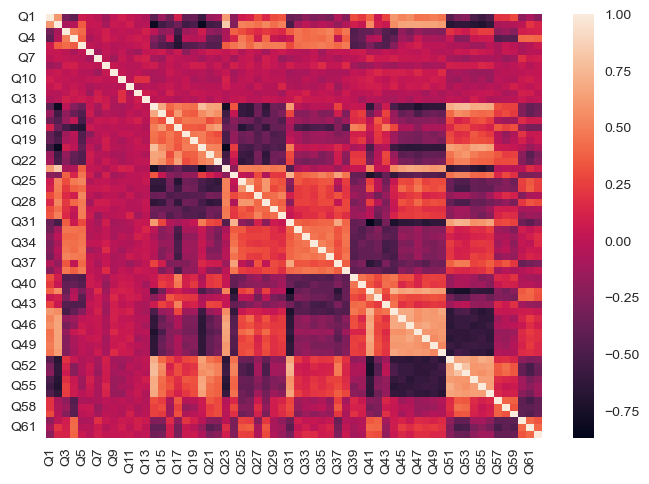

In [ ]:
plot=sns.heatmap(question_corr)
plt.show()

### PCA - No Rotation

There are multiple ways to implement PCA/Factor Analysis in Python. In this class, we use the implementation provided by the package `factor_analyzer` due to its ease of use. Another popular implementation is provided by `scikit-learn`.

Note that we do not need to standardize the data when using `factor_analyzer`. This is because the procedure automatically standardizes the data. When using `scikit-learn`, you would need to scale your data (similar to what we did for cluster analysis).



In [ ]:
ka_pca = factor_analyzer.FactorAnalyzer(n_factors=62,
                                          rotation=None,
                                          method='principal').fit(ka_X)

In [ ]:
ka_pca

FactorAnalyzer(method='principal', n_factors=62, rotation=None,
               rotation_kwargs={})

#### Loadings

In [ ]:
def get_loadings_communalities(pca,round_dig=2,index_names=None):
    df = pd.DataFrame(
        pca.loadings_,
        index=index_names if index_names else [f'q{i}' for i in range(1,1+pca.loadings_.shape[0])],
        columns=[f'RC{i}' for i in range(1,1+pca.loadings_.shape[1])] if pca.rotation else [f'PC{i}' for i in range(1,1+pca.loadings_.shape[1])]
        )
    if pca.rotation:
        df['communalities']=pca.get_communalities()
    df=df.round(3)
    return  df

get_loadings_communalities(ka_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62
q1,-0.545,-0.217,0.569,0.096,-0.005,0.016,0.020,-0.063,0.077,0.029,...,0.078,0.089,0.087,-0.071,0.004,-0.036,0.019,-0.028,0.004,0.008
q2,-0.853,0.151,0.288,-0.017,0.023,0.046,0.008,-0.001,0.055,0.013,...,-0.051,0.025,0.012,-0.057,-0.099,0.209,0.051,0.074,-0.056,-0.010
q3,0.175,0.660,-0.174,0.011,0.086,-0.004,0.068,0.039,-0.034,-0.131,...,0.047,-0.022,-0.031,0.035,-0.031,-0.005,-0.015,0.019,0.020,0.001
q4,-0.061,0.617,-0.569,-0.088,-0.039,0.009,0.104,0.018,0.027,-0.024,...,0.063,0.048,-0.004,-0.036,0.071,0.073,0.028,0.037,-0.014,0.005
q5,-0.174,0.799,0.261,0.033,-0.017,0.035,0.042,-0.008,0.004,-0.029,...,-0.036,0.044,0.117,0.107,0.040,-0.018,-0.011,-0.002,0.046,-0.012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
q58,0.234,-0.101,0.627,-0.038,-0.007,-0.085,0.094,-0.020,-0.087,0.027,...,0.038,0.008,0.083,-0.053,0.021,-0.003,0.004,-0.011,0.018,-0.016
q59,0.208,-0.210,0.609,-0.001,-0.123,0.090,0.065,0.202,0.112,0.034,...,-0.033,-0.022,-0.009,0.001,0.007,0.002,-0.039,0.012,0.010,-0.010
q60,-0.252,0.037,-0.648,0.079,-0.017,0.081,-0.071,0.087,-0.062,-0.004,...,-0.046,-0.020,-0.015,0.000,-0.007,0.006,0.025,-0.012,-0.021,-0.005
q61,-0.401,0.130,-0.600,0.007,0.090,-0.026,0.110,-0.137,0.119,0.070,...,-0.032,0.029,0.038,0.031,-0.004,-0.006,-0.009,-0.013,0.006,0.018


#### Explained Variance

In [ ]:
def get_summary(pca,round_dig=2):
    return pd.DataFrame(
        [pca.get_factor_variance()[0],
         pca.get_factor_variance()[1],
         pca.get_factor_variance()[2]],
        columns=['PC{}'.format(i) for i in
                 range(1,1+len(pca.get_factor_variance()[0]))],
        index=['Sum of Squares Loadings','Proportion of Variance Explained',
               'Cumulative Proportion']
                ).round(round_dig)

get_summary(ka_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62
Sum of Squares Loadings,16.60,10.78,5.79,1.47,1.28,1.21,1.17,1.12,1.01,0.98,...,0.16,0.15,0.15,0.14,0.12,0.12,0.11,0.09,0.08,0.08
Proportion of Variance Explained,0.27,0.17,0.09,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cumulative Proportion,0.27,0.44,0.54,0.56,0.58,0.60,0.62,0.64,0.65,0.67,...,0.98,0.99,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00


Text(0, 0.5, 'Variance')

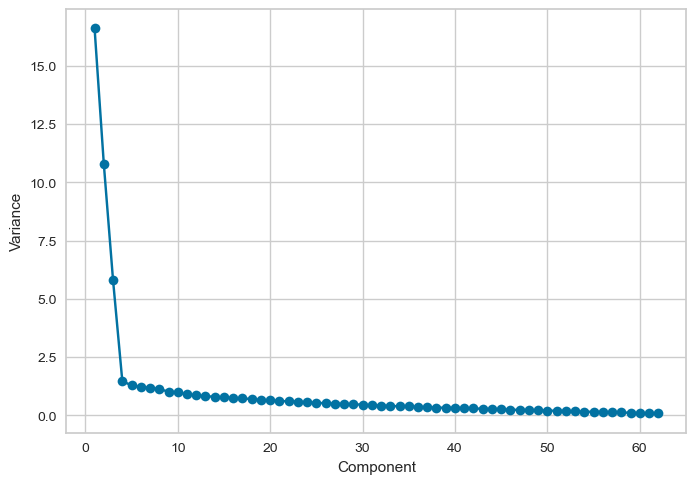

In [ ]:
# scree plot - shows successive proportion of additional variance that each component adds
import matplotlib.pyplot as plt
plt.plot(1+np.arange(len(ka_pca.get_factor_variance()[0])),
         ka_pca.get_factor_variance()[0],'o-')
plt.xlabel('Component')
plt.ylabel('Variance')

### PCA - Varimax Rotation

In [ ]:
ka_pca_rotated = factor_analyzer.FactorAnalyzer(n_factors=3,
                                          rotation='varimax',
                                          method='principal').fit(ka_X)

In [ ]:
ka_pca_rotated

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

#### Loadings & Communalities

In [ ]:
ka_load = get_loadings_communalities(ka_pca_rotated)

In [ ]:
ka_load_edit = ka_load[['RC1','RC2','RC3']]
ka_load_edit

,RC1,RC2,RC3
q1,0.630,-0.322,0.409
q2,0.910,0.023,0.075
q3,-0.119,0.687,-0.101
q4,0.008,0.643,-0.544
q5,0.340,0.751,0.240
...,...,...,...
q58,-0.089,-0.115,0.661
q59,-0.084,-0.224,0.633
q60,0.093,0.050,-0.688
q61,0.260,0.120,-0.675


In [ ]:
a = np.argmax(np.abs(ka_load_edit.to_numpy()),axis=1)
a = a+1

In [ ]:
pd.DataFrame(a,columns=['factor'])

,factor
0,1
1,1
2,2
3,2
4,2
...,...
57,3
58,3
59,3
60,3


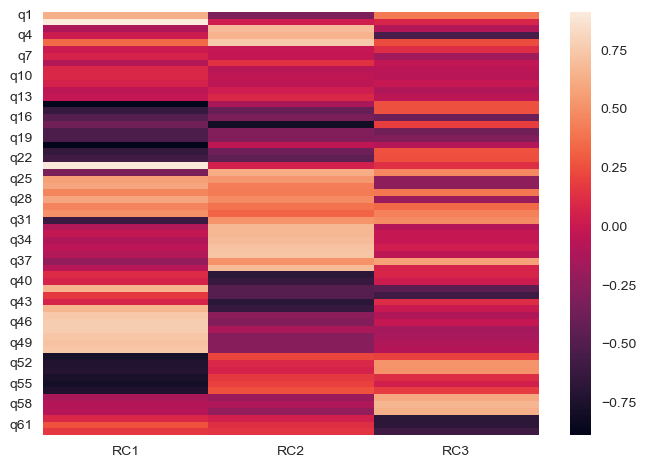

In [ ]:
plot=sns.heatmap(ka_load[['RC1','RC2','RC3']])

#### Scores

In [ ]:
ka_X_scores = ka_pca_rotated.transform(ka_X)
pd.DataFrame(ka_X_scores,columns=['RC1','RC2','RC3']).head(5)

,RC1,RC2,RC3
0,-1.002237,-1.042724,-0.706512
1,1.562683,-0.003871,-0.528081
2,-0.264483,1.857548,0.225793
3,-1.093728,-0.691215,-1.278540
4,-0.526620,1.718462,-0.033414


Note that the transformed data is already standardized!

### Let's get back to our regression

In [ ]:
# run regression
ols = sm.OLS(ka_Y,ka_X_scores)
ols_result = ols.fit()
print(ols_result.summary())

                                 OLS Regression Results                                
Dep. Variable:       Preference Group   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.3307
Date:                Thu, 21 Sep 2023   Prob (F-statistic):                       0.803
Time:                        15:28:11   Log-Likelihood:                         -522.68
No. Observations:                 250   AIC:                                      1051.
Df Residuals:                     247   BIC:                                      1062.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## segment

In [ ]:
ka_scores = pd.DataFrame(ka_X_scores,columns=['RC1','RC2','RC3'])

In [ ]:
ka_scores #ka scores就是新的group

,RC1,RC2,RC3
0,-1.002237,-1.042724,-0.706512
1,1.562683,-0.003871,-0.528081
2,-0.264483,1.857548,0.225793
3,-1.093728,-0.691215,-1.278540
4,-0.526620,1.718462,-0.033414
...,...,...,...
245,1.446551,-0.652796,-0.330107
246,-0.083063,1.641470,-0.109563
247,-0.352605,-0.540931,2.011422
248,-0.412228,1.658564,-0.329758


In [ ]:
# import Python packages
import pandas as pd
import numpy as np
np.random.seed(9650)
#from google.colab import files
import matplotlib.pyplot as plt
from sklearn import metrics

# Functions used to preprocess the data
from sklearn import preprocessing

# Functions used for Hierarchical Clustering
from scipy.cluster import hierarchy

# Functions used for K-Means
from sklearn import cluster

# Functions used for chi-squared test
from scipy.stats import chi2_contingency

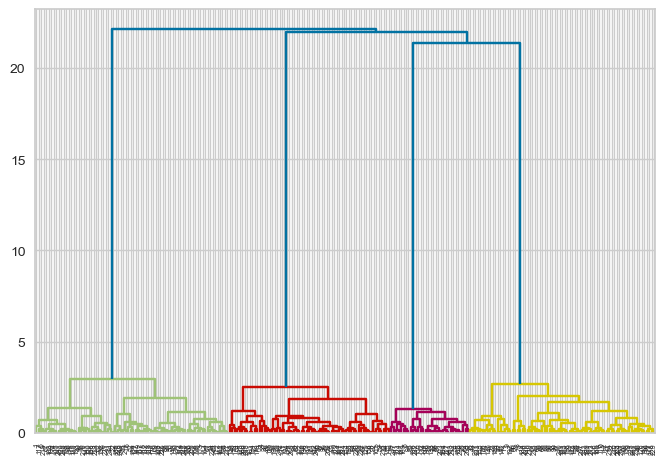

In [ ]:
linkages = hierarchy.linkage(ka_scores,method='ward')
hierarchy.dendrogram(linkages)
plt.show()

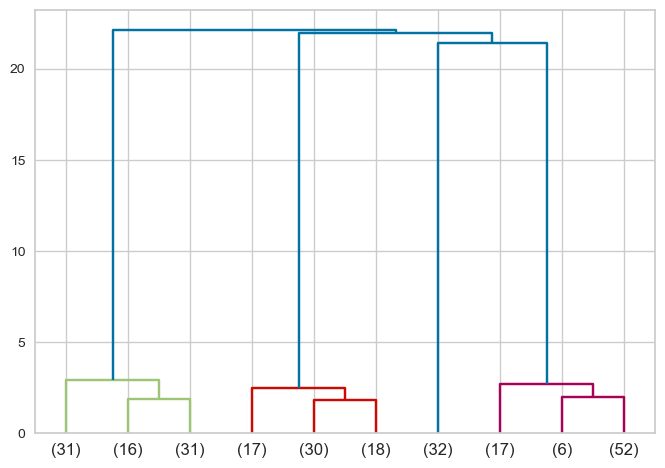

In [ ]:
hierarchy.dendrogram(linkages,orientation='top',
                     truncate_mode='lastp',p=10)
# p branches shown
plt.show()

In [ ]:
# function to show cluster size and calculate cluster average values
def check_clusters(data,labels):
    print(list(zip(*np.unique(labels,return_counts=True))))
    # pivot_table() calculates the mean by default
    return pd.pivot_table(data,index=labels)



In [ ]:
labels_hc = hierarchy.fcluster(linkages,t=2,criterion='maxclust')
# labels = label for each observation
print(labels_hc[:5])
# print number of observations in each cluster
print(list(zip(*np.unique(labels_hc,return_counts=True))))
# the horizontal ordering of the clusters/observations is not meaningful
check_clusters(ka_scores,labels_hc)

[2 1 2 2 2]
[(1, 78), (2, 172)]
[(1, 78), (2, 172)]


,RC1,RC2,RC3
1,1.383266,-0.430916,-0.245159
2,-0.627295,0.195415,0.111177


In [ ]:
labels_hc = hierarchy.fcluster(linkages,t=3,criterion='maxclust')
# labels = label for each observation
print(labels_hc[:5])
# print number of observations in each cluster
print(list(zip(*np.unique(labels_hc,return_counts=True))))
# the horizontal ordering of the clusters/observations is not meaningful
check_clusters(ka_scores,labels_hc)

[3 1 2 3 2]
[(1, 78), (2, 65), (3, 107)]
[(1, 78), (2, 65), (3, 107)]


,RC1,RC2,RC3
1,1.383266,-0.430916,-0.245159
2,-0.200742,1.643329,-0.056442
3,-0.886416,-0.684159,0.213001


In [ ]:
labels_hc = hierarchy.fcluster(linkages,t=5,criterion='maxclust')
# labels = label for each observation
print(labels_hc[:5])
# print number of observations in each cluster
print(list(zip(*np.unique(labels_hc,return_counts=True))))
# the horizontal ordering of the clusters/observations is not meaningful
check_clusters(ka_scores,labels_hc)

[5 1 3 5 3]
[(1, 31), (2, 47), (3, 65), (4, 32), (5, 75)]
[(1, 31), (2, 47), (3, 65), (4, 32), (5, 75)]


,RC1,RC2,RC3
1,1.324785,-0.349923,-0.516521
2,1.421839,-0.484336,-0.066175
3,-0.200742,1.643329,-0.056442
4,-0.464984,-0.533837,2.405634
5,-1.066228,-0.748296,-0.722522


In [ ]:
labels_hc = hierarchy.fcluster(linkages,t=4,criterion='maxclust')
# labels = label for each observation
print(labels_hc[:5])
# print number of observations in each cluster
print(list(zip(*np.unique(labels_hc,return_counts=True))))
# the horizontal ordering of the clusters/observations is not meaningful
check_clusters(ka_scores,labels_hc)

[4 1 2 4 2]
[(1, 78), (2, 65), (3, 32), (4, 75)]
[(1, 78), (2, 65), (3, 32), (4, 75)]


,RC1,RC2,RC3
1,1.383266,-0.430916,-0.245159
2,-0.200742,1.643329,-0.056442
3,-0.464984,-0.533837,2.405634
4,-1.066228,-0.748296,-0.722522


In [ ]:
tab = pd.crosstab(columns=labels_hc,index=ka['Preference Group'],margins=True,colnames=['Cluster'],rownames=['people'])
tab

Cluster,1,2,3,4,All
people,,,,,
1,34,29,18,35,116
2,13,32,4,23,72
3,31,4,10,17,62
All,78,65,32,75,250


In [ ]:
chi2, p, dof, expected = chi2_contingency(tab.values[:3,:4])
chi2, p, dof

(34.10898446041661, 6.409128675702831e-06, 6)

# k-means

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

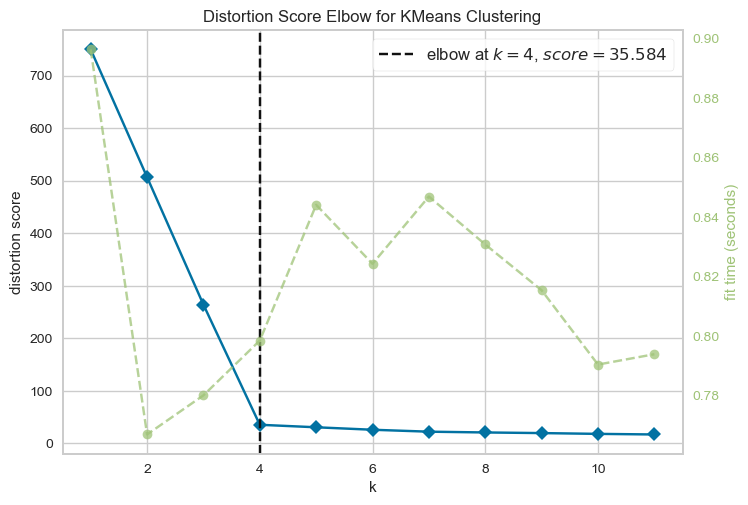

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# k_means() is a wrapper that returns the result of KMeans.fit()
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(ka_scores)
visualizer.show()

In [ ]:
centroids_km, labels_km, inertia_km = cluster.k_means(ka_scores,n_clusters=4,random_state=9650)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
check_clusters(ka_scores,labels_km)

[(0, 32), (1, 75), (2, 78), (3, 65)]


,RC1,RC2,RC3
0,-0.464984,-0.533837,2.405634
1,-1.066228,-0.748296,-0.722522
2,1.383266,-0.430916,-0.245159
3,-0.200742,1.643329,-0.056442


In [ ]:
labels_km

array([1, 2, 3, 1, 3, 2, 2, 2, 0, 1, 2, 3, 0, 1, 2, 1, 2, 1, 2, 0, 3, 3,
       2, 3, 3, 0, 3, 1, 1, 1, 3, 2, 1, 1, 3, 3, 3, 3, 2, 1, 2, 1, 3, 1,
       3, 3, 1, 1, 3, 1, 1, 0, 3, 3, 0, 0, 1, 3, 2, 3, 1, 1, 2, 1, 0, 3,
       2, 2, 1, 2, 2, 1, 0, 3, 2, 1, 1, 3, 1, 1, 2, 3, 2, 2, 3, 2, 1, 2,
       0, 3, 1, 0, 3, 1, 3, 2, 1, 1, 2, 0, 3, 3, 3, 2, 0, 2, 1, 3, 2, 2,
       3, 0, 1, 2, 2, 3, 1, 2, 2, 2, 2, 1, 2, 3, 0, 3, 1, 2, 1, 3, 3, 0,
       2, 0, 1, 2, 3, 1, 3, 1, 1, 2, 1, 1, 0, 3, 0, 2, 2, 2, 2, 1, 2, 2,
       2, 0, 2, 2, 1, 1, 1, 3, 2, 2, 2, 2, 2, 3, 2, 0, 2, 0, 2, 2, 3, 2,
       1, 1, 3, 3, 0, 1, 3, 0, 3, 2, 3, 3, 1, 1, 3, 3, 2, 2, 3, 3, 0, 1,
       1, 1, 3, 1, 3, 0, 1, 3, 1, 1, 0, 2, 1, 2, 0, 1, 1, 3, 2, 1, 1, 2,
       3, 2, 3, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 3, 1, 1, 2, 2, 0, 1, 2,
       3, 1, 2, 2, 3, 0, 3, 2])

In [ ]:
tab = pd.crosstab(columns=labels_km,index=ka['Preference Group'],margins=True,colnames=['Cluster'],rownames=['people'])
tab

Cluster,0,1,2,3,All
people,,,,,
1,18,35,34,29,116
2,4,23,13,32,72
3,10,17,31,4,62
All,32,75,78,65,250


In [ ]:
chi2, p, dof, expected = chi2_contingency(tab.values[:3,:4])
chi2, p, dof

(34.10898446041661, 6.409128675702831e-06, 6)

In [ ]:
check_clusters(ka_scores,labels_km)

[(0, 32), (1, 75), (2, 78), (3, 65)]


,RC1,RC2,RC3
0,-0.464984,-0.533837,2.405634
1,-1.066228,-0.748296,-0.722522
2,1.383266,-0.430916,-0.245159
3,-0.200742,1.643329,-0.056442
